## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
import statsmodels as am

## Data exploration and cleaning

In [2]:
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

- There is no missing data according to the results from the info() function.
- Dtypes are non-numeric. Two of which are datetime.

In [3]:
df.head()

,ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [4]:
df.size

408582

In [5]:
df.describe(include= 'all') 
#Regarding fare amount, the distribution is worth considering. 
# The maximum fare amount is a much larger value ($1000) than the 25-75 percent range of values. 
# Also, it's questionable how there are negative values for fare amount. 
# Regarding trip distance, most rides are between 1-3 miles, but the maximum is over 33 miles.

,ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
unique,NaN,NaN,22687,22688,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,07/03/2017 3:45:19 PM,10/18/2017 8:07:45 PM,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,2,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.675849e+07,1.556236,NaN,NaN,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,NaN,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,NaN,NaN,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,NaN,NaN,1.000000,1.610000,1.000000,NaN,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,NaN,NaN,2.000000,3.060000,1.000000,NaN,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000


## Understand the data - Investigate the variables

In [6]:
## Sort the data by trip distance from maximum to minimum value
df.sort_values(by = 'trip_distance', ascending= False)[:10] #we noticed that the longest rides are approximately 33 miles.

,ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
9280,51810714,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
6064,49894023,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
10291,76319330,2,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80
29,94052446,2,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38
18130,90375786,1,10/26/2017 2:45:01 PM,10/26/2017 4:12:49 PM,1,30.50,1,N,132,220,1,90.50,0.0,0.5,19.85,8.16,0.3,119.31
5792,68023798,2,08/11/2017 2:14:01 PM,08/11/2017 3:17:31 PM,1,30.33,2,N,132,158,1,52.00,0.0,0.5,14.64,5.76,0.3,73.20
15350,77309977,2,09/14/2017 1:44:44 PM,09/14/2017 2:34:29 PM,1,28.23,2,N,13,132,1,52.00,0.0,0.5,4.40,5.76,0.3,62.96
10302,43431843,1,05/15/2017 8:11:34 AM,05/15/2017 9:03:16 AM,1,28.20,2,N,90,132,1,52.00,0.0,0.5,11.71,5.76,0.3,70.27
2592,51094874,2,06/16/2017 6:51:20 PM,06/16/2017 7:41:42 PM,1,27.97,2,N,261,132,2,52.00,4.5,0.5,0.00,5.76,0.3,63.06


In [7]:
# Sort the data by total amount and print the top 20 values
df.sort_values(by = 'total_amount', ascending= False)[:20] #the first two values are significantly higher than the others.
                                                            #The most expensive rides are not necessarily the longest ones.

,ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8476,11157412,1,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,1,2.60,5,N,226,226,1,999.99,0.0,0.0,200.00,0.00,0.3,1200.29
20312,107558404,2,12/19/2017 9:40:46 AM,12/19/2017 9:40:55 AM,2,0.00,5,N,265,265,2,450.00,0.0,0.0,0.00,0.00,0.3,450.30
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
12511,107108848,2,12/17/2017 6:24:24 PM,12/17/2017 6:24:42 PM,1,0.00,5,N,265,265,1,175.00,0.0,0.0,46.69,11.75,0.3,233.74
15474,55538852,2,06/06/2017 8:55:01 PM,06/06/2017 8:55:06 PM,1,0.00,5,N,265,265,1,200.00,0.0,0.5,11.00,0.00,0.3,211.80
6064,49894023,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
16379,101198443,2,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,1,25.50,5,N,132,265,2,140.00,0.0,0.5,0.00,16.26,0.3,157.06
3582,111653084,1,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,1,7.30,5,N,1,1,1,152.00,0.0,0.0,0.00,0.00,0.3,152.30
11269,51920669,1,06/19/2017 12:51:17 AM,06/19/2017 12:52:12 AM,2,0.00,5,N,265,265,1,120.00,0.0,0.0,20.00,11.52,0.3,151.82
9280,51810714,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30


In [8]:
# Sort the data by total amount and print the bottom 20 values
df.sort_values(by = 'total_amount', ascending= True)[:20]

,ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
12944,29059760,2,04/08/2017 12:00:16 AM,04/08/2017 11:15:57 PM,1,0.17,5,N,138,138,4,-120.00,0.0,0.0,0.0,0.0,-0.3,-120.30
20698,14668209,2,02/24/2017 12:38:17 AM,02/24/2017 12:42:05 AM,1,0.70,1,N,65,25,4,-4.50,-0.5,-0.5,0.0,0.0,-0.3,-5.80
17602,24690146,2,03/24/2017 7:31:13 PM,03/24/2017 7:34:49 PM,1,0.46,1,N,87,45,4,-4.00,-1.0,-0.5,0.0,0.0,-0.3,-5.80
11204,58395501,2,07/09/2017 7:20:59 AM,07/09/2017 7:23:50 AM,1,0.64,1,N,50,48,3,-4.50,0.0,-0.5,0.0,0.0,-0.3,-5.30
14714,109276092,2,12/24/2017 10:37:58 PM,12/24/2017 10:41:08 PM,5,0.40,1,N,164,161,4,-4.00,-0.5,-0.5,0.0,0.0,-0.3,-5.30
8204,91187947,2,10/28/2017 8:39:36 PM,10/28/2017 8:41:59 PM,1,0.41,1,N,236,237,3,-3.50,-0.5,-0.5,0.0,0.0,-0.3,-4.80
20317,75926915,2,09/09/2017 10:59:51 PM,09/09/2017 11:02:06 PM,1,0.24,1,N,116,116,4,-3.50,-0.5,-0.5,0.0,0.0,-0.3,-4.80
10281,55302347,2,06/05/2017 5:34:25 PM,06/05/2017 5:36:29 PM,2,0.00,1,N,238,238,4,-2.50,-1.0,-0.5,0.0,0.0,-0.3,-4.30
5448,28459983,2,04/06/2017 12:50:26 PM,04/06/2017 12:52:39 PM,1,0.25,1,N,90,68,3,-3.50,0.0,-0.5,0.0,0.0,-0.3,-4.30
4423,97329905,2,11/16/2017 8:13:30 PM,11/16/2017 8:14:50 PM,2,0.06,1,N,237,237,4,-3.00,-0.5,-0.5,0.0,0.0,-0.3,-4.30


In [9]:
# check payment type are represented in the data
df['payment_type'].value_counts()

payment_type
1    15265
2     7267
3      121
4       46
Name: count, dtype: int64

In [10]:
## the average tip for trips paid for with credit card:
avg_cc_tip = df[df['payment_type'] == 1]['tip_amount'].mean()
print('Avg. cc tip:', avg_cc_tip)

# the average tip for trips paid for with cash
avg_cash_tip = df[df['payment_type'] == 2]['tip_amount'].mean()
print('Avg. cash tip:', avg_cash_tip)

Avg. cc tip: 2.7298001965280054
Avg. cash tip: 0.0


In [11]:
#  How many times is each vendor ID represented in the data:
df['VendorID'].value_counts()

VendorID
2    12626
1    10073
Name: count, dtype: int64

In [12]:
#the mean total amount for each vendor
df.groupby('VendorID')[['total_amount']].mean(numeric_only=True)

,total_amount
VendorID,
1,16.298119
2,16.320382


In [13]:
# Filter the data for credit card payments only
credit_card=df[df['payment_type'] == 1]
credit_card

,ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22692,60425673,1,07/16/2017 3:22:51 AM,07/16/2017 3:40:52 AM,1,5.70,1,N,249,17,1,19.0,0.5,0.5,4.05,0.00,0.3,24.35
22693,67858616,2,08/10/2017 10:20:04 PM,08/10/2017 10:29:31 PM,1,0.89,1,N,229,170,1,7.5,0.5,0.5,1.76,0.00,0.3,10.56
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00


In [14]:
# Filter the data for passenger count only
df['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

In [15]:
# Calculate the average tip amount for each passenger count (credit card payments only)
credit_card.groupby(['passenger_count'])[['tip_amount']].mean(numeric_only=True)

,tip_amount
passenger_count,
0,2.610370
1,2.714681
2,2.829949
3,2.726800
4,2.607753
5,2.762645
6,2.643326


#### Convert the date column to datetime

In [16]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df.dtypes

ID                                int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

## Check for outliers on relevant columns

<Axes: title={'center': 'Trip Distance'}, xlabel='trip_distance'>

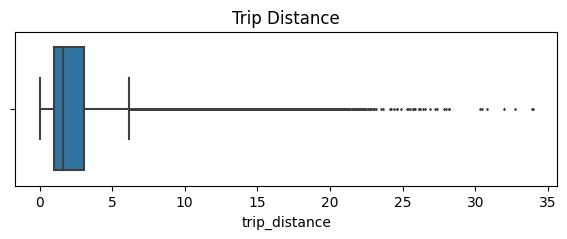

In [17]:
# Create box plot of trip_distance
plt.figure(figsize= (7,2))
plt.title('Trip Distance')
sns.boxplot(data = None, x = df['trip_distance'], fliersize=1)

Text(0.5, 1.0, 'Trip distance histogram')

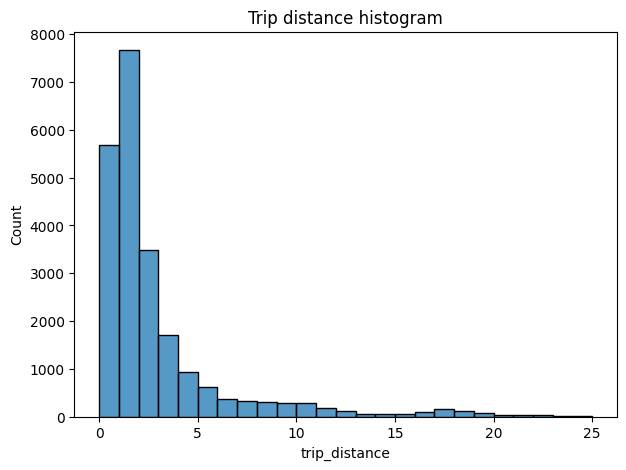

In [18]:
# Create histogram of trip_distance
plt.figure(figsize= (7,5))
sns.histplot(df['trip_distance'], bins = range(0,26,1))
plt.title('Trip distance histogram')

<Axes: title={'center': 'Total Amount'}, xlabel='total_amount'>

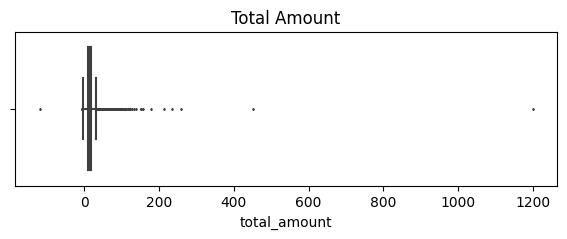

In [19]:
# Create box plot of total_amount
plt.figure(figsize= (7,2))
plt.title('Total Amount')
sns.boxplot(data = None, x = df['total_amount'], fliersize= 1)

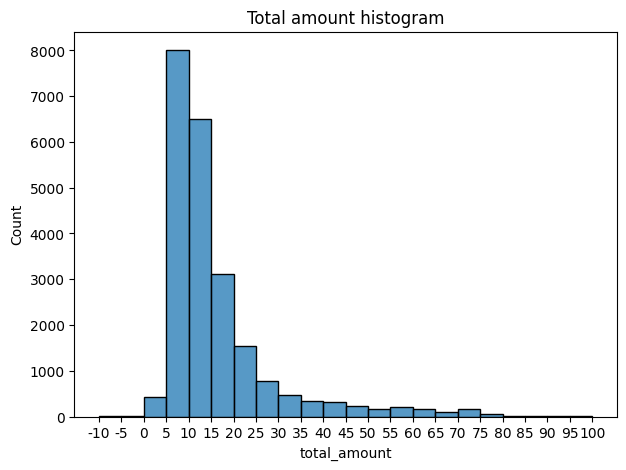

In [20]:
# Create histogram of total_amount
plt.figure(figsize=(7,5))
ax = sns.histplot(df['total_amount'], bins=range(-10,101,5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.title('Total amount histogram');

<Axes: title={'center': 'Tip Amount'}, xlabel='tip_amount'>

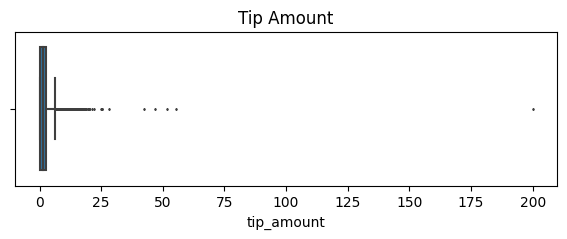

In [21]:
# Create box plot of tip_amount
plt.figure(figsize=(7,2))
plt.title('Tip Amount')
sns.boxplot(data = None, x = df['tip_amount'], fliersize=1)

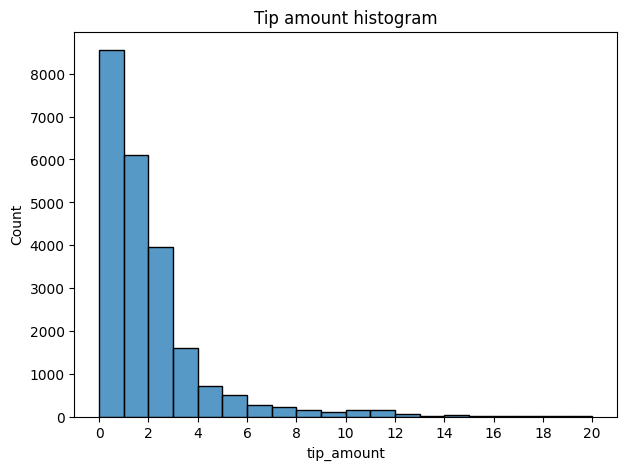

In [22]:
# Create histogram of tip_amount
plt.figure(figsize=(7,5))
ax = sns.histplot(df['tip_amount'], bins=range(0,21,1))
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title('Tip amount histogram');

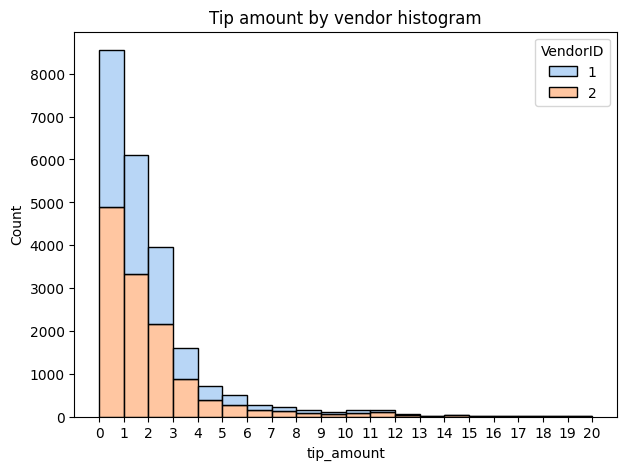

In [23]:
# Create histogram of tip_amount by vendor
plt.figure(figsize= (7,5))
ax = sns.histplot( data = df, x = 'tip_amount', bins = range(0, 21, 1), 
                  hue = 'VendorID',
                  multiple='stack',
                  palette= 'pastel')

ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram');

- Separating the tip amount by vendor reveals that there are no noticeable aberrations in the distribution of tips between the two vendors in the dataset. Vendor two has  slightly higher share of the rides, and this proportion is approximately maintainted for all tips amount  

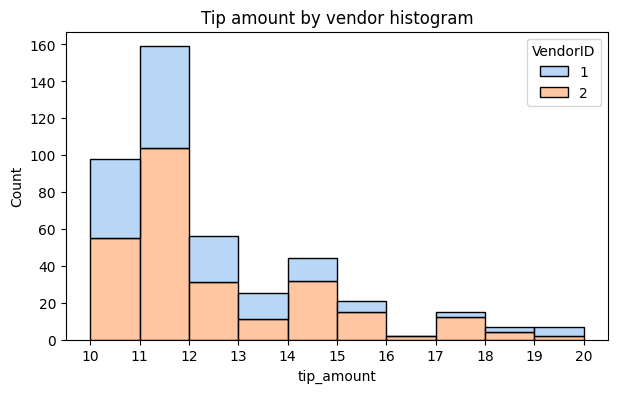

In [24]:
# Create histogram of tip_amount by vendor for tips > $10 
tips_over_ten = df[df['tip_amount'] > 10]
plt.figure(figsize=(7,4))
ax = sns.histplot(data=tips_over_ten, x='tip_amount', bins=range(10,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip amount by vendor histogram');

- The proportion are maintained even at these higher tip amount, with the exception being at highest extremity, but this is not noteworthy due to the low sample size at these tip amounts.

In [25]:
#Examine the unique values in the passenger_count column.
df.passenger_count.value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

- Nearly two thirds of the rides were single occupancy, though there were still nearly 700 rides with as many as six passengers. Also there are 33 rides with an occupancy count of zero, which doesn't make sense

In [26]:
# Calculate mean tips by passenger_count
mean_tips_by_passenger_count = df.groupby(['passenger_count'])[['tip_amount']].mean()
mean_tips_by_passenger_count

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


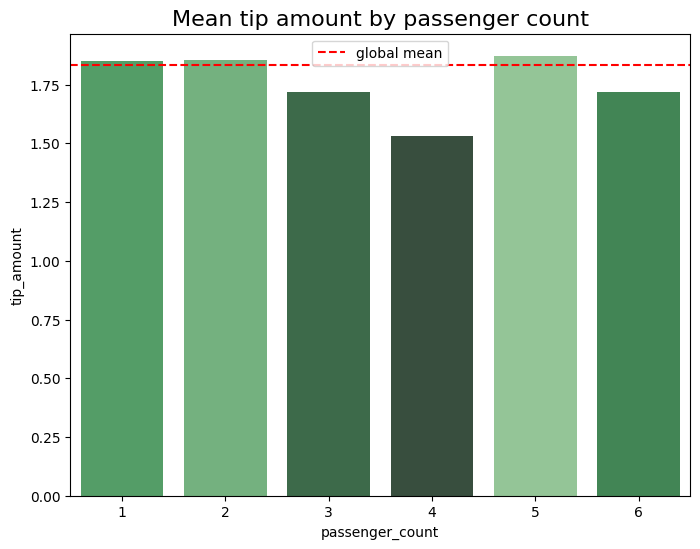

In [27]:
# Create bar plot for mean tips by passenger count
data = mean_tips_by_passenger_count.tail(-1)
pal = sns.color_palette("Greens_d", len(data))
rank = data['tip_amount'].argsort().argsort()
plt.figure(figsize=(8,6))
ax = sns.barplot(x=data.index,
            y=data['tip_amount'],
            palette=np.array(pal[::-1])[rank])
ax.axhline(df['tip_amount'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title('Mean tip amount by passenger count', fontsize=16);

- Mean tip amount varies very little by passenger count. Although it does drop noticeably for four-passenger rides, it's expected that there would be a higher degree of fluctuation because rides with four passengers were the least plentiful in the dataset (aside from rides with zero passengers).

In [28]:
# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name().str.slice(stop= 3)

# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.slice(stop = 3)

In [29]:
# Get total number of rides for each month
monthly_rides = df['month'].value_counts()
monthly_rides

month
Mar    2049
Oct    2027
Apr    2019
May    2013
Jan    1997
Jun    1964
Dec    1863
Nov    1843
Feb    1769
Sep    1734
Aug    1724
Jul    1697
Name: count, dtype: int64

In [30]:
# Reorder the monthly ride list so months go in order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
         'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

month
Jan    1997
Feb    1769
Mar    2049
Apr    2019
May    2013
Jun    1964
Jul    1697
Aug    1724
Sep    1734
Oct    2027
Nov    1843
Dec    1863
Name: count, dtype: int64

In [31]:
# Show the index
monthly_rides.index

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'],
      dtype='object', name='month')

Text(0.5, 1.0, 'Ride count by month')

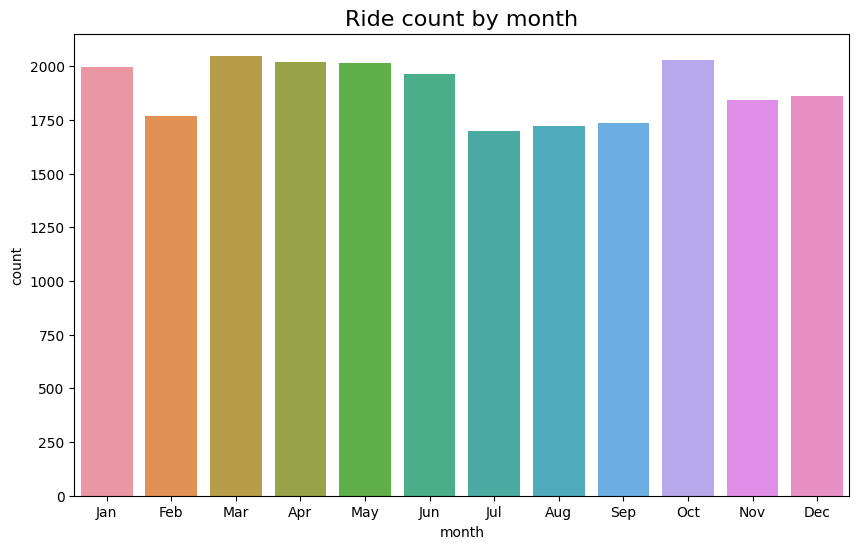

In [32]:
# Create a bar plot of total rides per month
plt.figure(figsize=(10,6))
ax = sns.barplot(x = monthly_rides.index, y = monthly_rides)
ax.set_xticklabels(month_order)
plt.title('Ride count by month', fontsize = 16)

- Monthly rides are fairly consistents, with notable dips in the summer months of July, August, and September and also in February  

In [33]:
# Plot total ride count by day

day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daily_rides = df['day'].value_counts().reindex(index = day_order)
daily_rides


day
Mon    2931
Tue    3198
Wed    3390
Thu    3402
Fri    3413
Sat    3367
Sun    2998
Name: count, dtype: int64

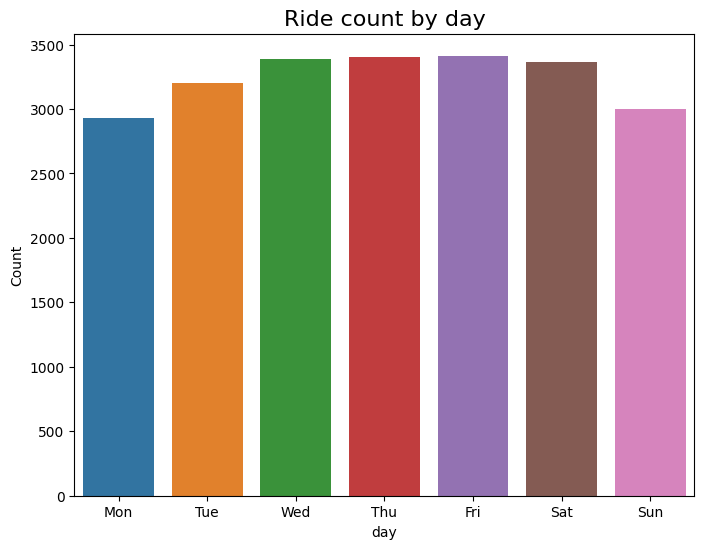

In [34]:
# Create bar plot for ride count by day
plt.figure(figsize=(8,6))
ax = sns.barplot(x=daily_rides.index, y=daily_rides)
ax.set_xticklabels(day_order)
ax.set_ylabel('Count')
plt.title('Ride count by day', fontsize=16);

- Wednesday through Saturday had the highest number of daily rides, while Sunday and Monday had the least.

In [35]:
# calculate the total revenue by day of the week
total_amount_day = df.groupby('day')[['total_amount']].sum().reindex(index=day_order)
total_amount_day

,total_amount
day,
Mon,49574.37
Tue,52527.14
Wed,55310.47
Thu,57181.91
Fri,55818.74
Sat,51195.40
Sun,48624.06


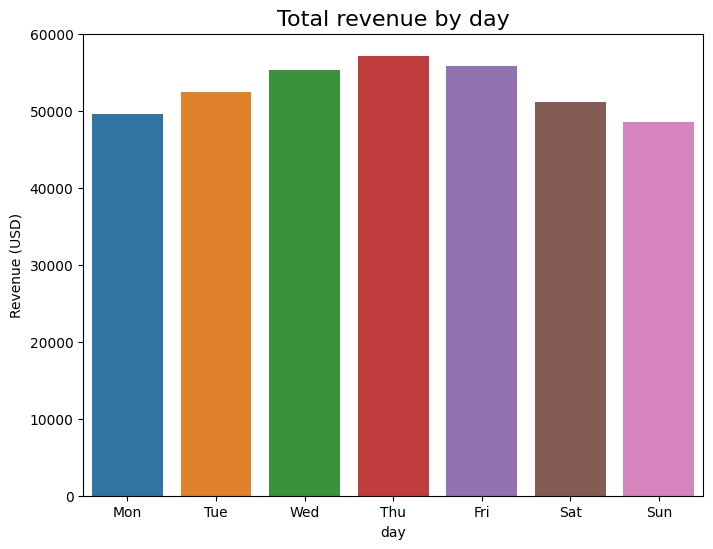

In [36]:
# Create bar plot for revenue by day
plt.figure(figsize=(8,6))
ax = sns.barplot(x = total_amount_day.index, y = total_amount_day['total_amount'])
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by day', fontsize=16);

- Thursday had the highest gross revenue of all days, and Sunday and Monday had the least. Interestingly, although Saturday had only 35 fewer rides than Thursday, its gross revenue was ~$6,000 less than Thursday's—more than a 10% drop.

In [37]:
# total revenue by month
total_amount_month = df.groupby(['month'])[['total_amount']].sum().reindex(index= month_order)
total_amount_month

,total_amount
month,
Jan,31735.25
Feb,28937.89
Mar,33085.89
Apr,32012.54
May,33828.58
Jun,32920.52
Jul,26617.64
Aug,27759.56
Sep,28206.38


Text(0.5, 1.0, 'Ride count by month')

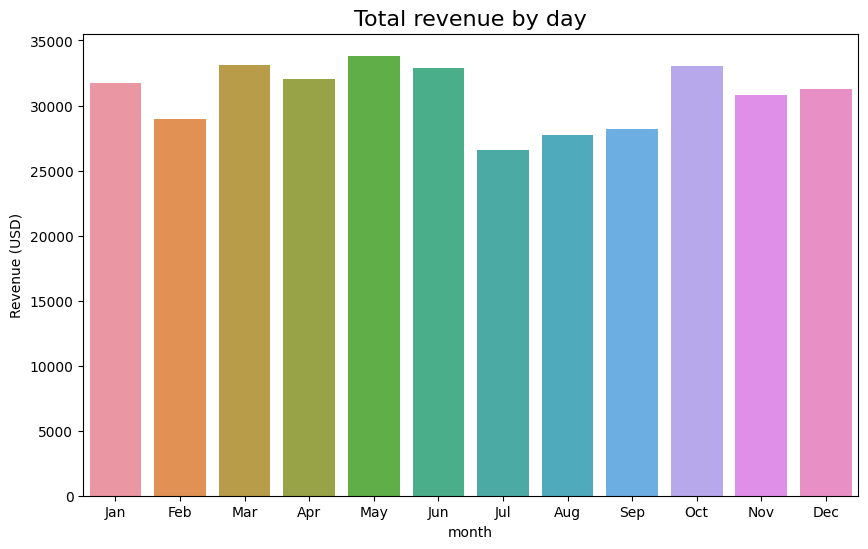

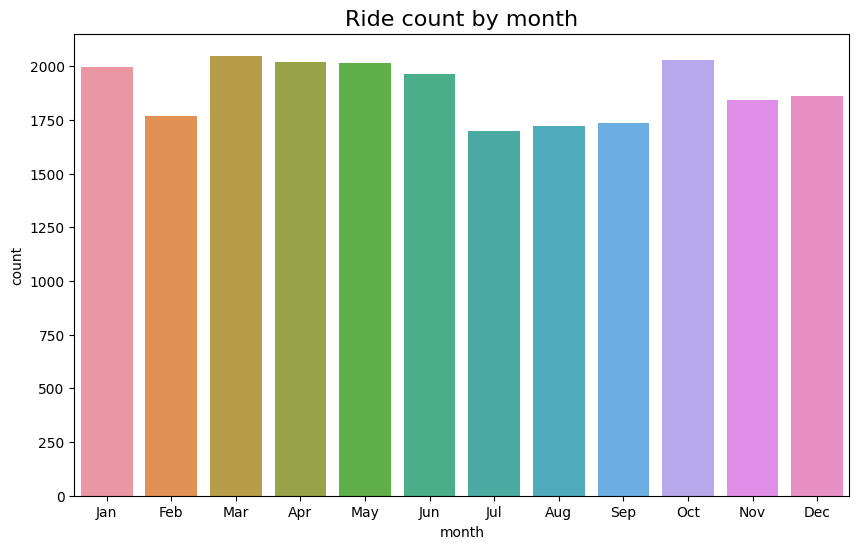

In [38]:
# Create bar plot for revenue by month
plt.figure(figsize= (10,6))
ax = sns.barplot(x = total_amount_month.index, y = total_amount_month['total_amount'])
ax.set_xticklabels(month_order)
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by day', fontsize=16);

plt.figure(figsize=(10,6))
ax = sns.barplot(x = monthly_rides.index, y = monthly_rides)
ax.set_xticklabels(month_order)
plt.title('Ride count by month', fontsize = 16)

- Monthly revenue generally follows the pattern of monthly rides, with noticeable dips in the summer months of July, August, and September, and also one in February.

In [39]:
# Get number of unique drop-off location IDs
df['DOLocationID'].nunique()

216

In [40]:
# Calculate the mean trip distance for each drop-off location
distance_by_dropoff = df.groupby('DOLocationID')[['trip_distance']].mean().sort_values(by = 'trip_distance')
distance_by_dropoff


,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


Text(0.5, 1.0, 'Mean trip distance by drop-off location')

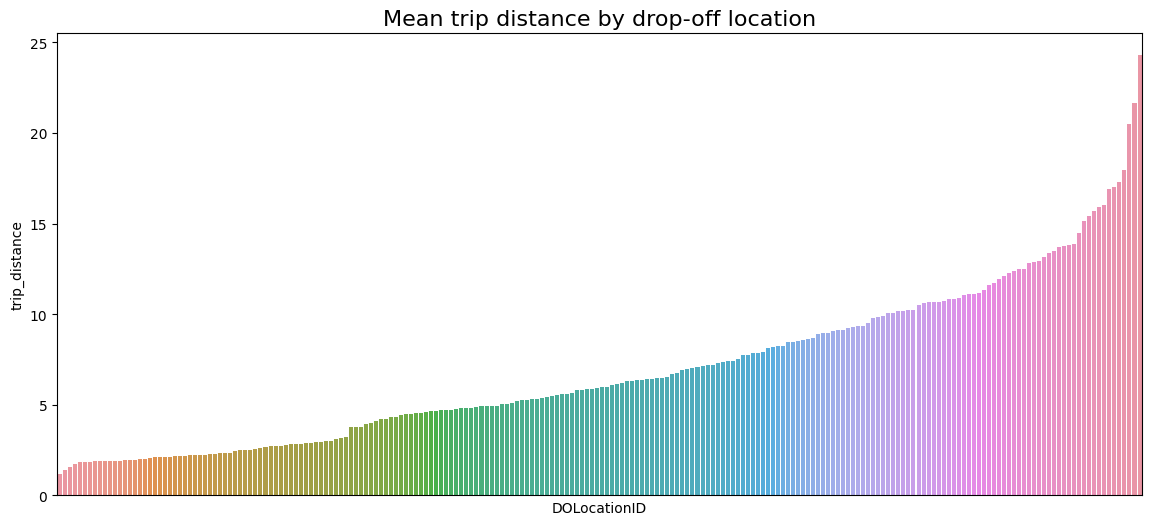

In [41]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize= (14,6))
ax = sns.barplot(x = distance_by_dropoff.index
                 , y = distance_by_dropoff['trip_distance'],
                 order= distance_by_dropoff.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=16)

- This plot presents a characteristic curve related to the cumulative density function of a normal distribution. In other words, it indicates that the drop-off points are relatively evenly distributed over the terrain. This is good to know, because geographic coordinates were not included in this dataset, so there was no obvious way to test for the distibution of locations.

In [42]:
df['trip_duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])
df.head()

,ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,Mar,Sat,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,Apr,Tue,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,Dec,Fri,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sun,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,Apr,Sat,0 days 00:16:43


## Conduct an A/B test
The goal for this A/B test is to sample data and analyze whether there is a relationship between payment type and fare amount.

In [43]:
# Look at the average fare amount for each payment type
df.groupby('payment_type')['fare_amount'].mean()

payment_type
1    13.429748
2    12.213546
3    12.186116
4     9.913043
Name: fare_amount, dtype: float64

Based on the averages show, it appears that customers who pay in credit card tend to pay a larger fare than customers who pay in cash. However, this difference might arise from random sampling, rather than being a true difference in fare amount. to assess whether the differcen is statistically significant, I cinduct a hypothesis test.

## Hypothesis testing
- $H_0$: There is no difference in the average fare amount between customers who use credit cards and customers who use cash
- $H_A$: There is a difference in the average fare amount between customers who use credit cards and customers who use cash

Choose significance level is 5%

In [44]:
significance_level = 0.05
significance_level

0.05

In [45]:
df_crc = df[df['payment_type'] == 1]['fare_amount']
df_cash = df[df['payment_type'] == 2]['fare_amount']

In [46]:
stats.ttest_ind(a = df_crc, b = df_cash, equal_var= False)


TtestResult(statistic=6.866800855655372, pvalue=6.797387473030518e-12, df=16675.48547403633)

Since the p-value is significantly smaller than the significance level of 5%, ==> Reject the null hypothesis

### Conclude: 
There is a statistically significant difference in the average fare amount between customers who use credit cards and customers eho use cash

## Draw Insights
- The key business insight is that encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers.